In [1]:
# multiclass SVM  loss : code snippet 
import numpy as np 

def L_i_vecorized(x,y,W):
    scores = W.dot(x)
    margines = np.maximum(0,scores - scores[y]+1)
    margines[y] = 0
    loss_i = np.sum(margines)
    return loss_i 

In [ ]:
# regulization
# they are too many regulization methods 
# L1 ,L2 , elastic net (L1+L2) (for now)

In [ ]:
import numpy as np

def softmax_loss_i_vectorized(x, y, W):
    """
    Softmax (cross-entropy) loss for a single example, vectorized implementation
    
    Parameters:
    x: Input data of shape (D,)
    y: Integer label (correct class)
    W: Weight matrix of shape (C, D)
    
    Returns:
    loss_i: Softmax loss for this example
    """
    scores = W.dot(x)  # Shape: (C,)
    
    # Numerical stability: shift scores so that the highest value is 0
    scores_shifted = scores - np.max(scores)
    
    # Compute softmax probabilities
    exp_scores = np.exp(scores_shifted)
    probabilities = exp_scores / np.sum(exp_scores)
    
    # Compute cross-entropy loss
    loss_i = -np.log(probabilities[y])
    
    return loss_i

# Alternative implementation that also returns probabilities (useful for backprop)
def softmax_loss_i_with_probs(x, y, W):
    """
    Softmax loss that also returns probabilities for backpropagation
    """
    scores = W.dot(x)
    
    # Numerical stability
    scores_shifted = scores - np.max(scores)
    
    # Compute softmax
    exp_scores = np.exp(scores_shifted)
    probabilities = exp_scores / np.sum(exp_scores)
    
    # Compute loss
    loss_i = -np.log(probabilities[y])
    
    return loss_i, probabilities

# Batch version for multiple examples
def softmax_loss_batch(X, y, W):
    """
    Softmax loss for a batch of examples
    
    Parameters:
    X: Input data of shape (D, N) where N is number of examples
    y: Labels of shape (N,)
    W: Weight matrix of shape (C, D)
    
    Returns:
    loss: Average softmax loss over the batch
    """
    N = X.shape[1]
    scores = W.dot(X)  # Shape: (C, N)
    
    # Numerical stability
    scores_shifted = scores - np.max(scores, axis=0, keepdims=True)
    
    # Compute softmax probabilities
    exp_scores = np.exp(scores_shifted)
    probabilities = exp_scores / np.sum(exp_scores, axis=0, keepdims=True)
    
    # Get probabilities of correct classes
    correct_class_probs = probabilities[y, np.arange(N)]
    
    # Compute losses
    losses = -np.log(correct_class_probs)
    
    # Average loss
    loss = np.mean(losses)
    
    return loss

In [ ]:
# gradient descent 


Gradient descent 
W_new = W_old - α * ∇L(W_old)
```

Where:
- `W` = your model parameters (weights)
- `α` (alpha) = learning rate (step size)
- `∇L(W)` = gradient of loss with respect to W

### **What is the Gradient?**
For a loss function `L(W)`, the gradient is:
```
∇L(W) = [∂L/∂w₁, ∂L/∂w₂, ..., ∂L/∂wₙ]
```

It's a vector of partial derivatives—one for each weight. Each component tells you: "if I increase this weight slightly, how much does the loss increase?"

### **Computing the Gradient**
In practice, for a dataset with N examples:
```
L(W) = (1/N) * Σᵢ L(f(xᵢ, W), yᵢ)
```

The gradient is:
```
∇L(W) = (1/N) * Σᵢ ∇L(f(xᵢ, W), yᵢ)

In [ ]:
# A. Batch Gradient Descent (BGD) - "Full Batch"
# What it does:
# Uses all training examples to compute the gradient in each step.
# Pseudocode
N = int()
learning_rate = float()
num_epochs = int()
def compute_gradient(x,y,w):
    pass
for epoch in range(num_epochs):
    gradient = 0
    for i in range(N):  # ALL examples
        gradient += compute_gradient(x[i], y[i], W)
    gradient /= N
    W = W - learning_rate * gradient

Pros:

✅ Stable, smooth convergence
✅ Guaranteed to converge to global minimum (for convex functions)
✅ Exact gradient direction

Cons:

❌ Slow for large datasets (must process all N examples before one update)
❌ Memory intensive (need to load all data)
❌ Gets stuck in local minima for non-convex functions

When to use:

Small datasets (N < 10k)
When you need very precise convergence
Academic settings, proofs

In [ ]:
# B. Stochastic Gradient Descent (SGD) - "One Example at a Time"
# What it does:
# Uses one random example at a time to compute the gradient.
# Pseudocode
def shuffle(x):
    pass
for epoch in range(num_epochs):
    shuffle(data)
    for i in range(N):  # ONE example at a time
        gradient = compute_gradient(x[i], y[i], W)
        W = W - learning_rate * gradient

Key Insight:
The gradient from one example is noisy but unbiased—on average, it points in the right direction.
Pros:

✅ Fast updates (one example → one update)
✅ Can escape local minima (noise helps exploration)
✅ Memory efficient
✅ Online learning (can update as new data arrives)

Cons:

❌ Noisy convergence (loss bounces around)
❌ Harder to parallelize
❌ May not converge to exact minimum (oscillates around it)

When to use:

Large datasets (N > 100k)
Online learning
When you want to escape saddle points

In [ ]:
# C. Mini-Batch Gradient Descent (MBGD) - "The Sweet Spot"
# What it does:
# Uses a small batch of examples (e.g., 32, 64, 128) to compute the gradient.
batch_size = 64
def get_batches(x,y):
    pass
for epoch in range(num_epochs):
    shuffle(data)
    for batch in get_batches(data, batch_size):
        gradient = 0
        for (x, y) in batch:
            gradient += compute_gradient(x, y, W)
        gradient /= batch_size
        W = W - learning_rate * gradient

**Pros:**
- ✅ **Balance between BGD and SGD**
- ✅ Less noisy than SGD, faster than BGD
- ✅ **Vectorized operations** (GPU-friendly)
- ✅ More stable convergence than SGD
- ✅ Still escapes local minima

**Cons:**
- ❌ Need to tune batch size (hyperparameter)
- ❌ Still some noise (but less than SGD)

**When to use:**
- **Always** (this is the industry standard)
- Deep learning with GPUs
- 99% of modern neural network training

**Typical batch sizes:**
- Small models: 32-64
- Standard: 128-256
- Large models/GPUs: 512-1024

## 4️⃣ Visual Comparison
```
Loss landscape view:

BGD:   Smooth, deterministic path
       ────────────────────────→ minimum
       
SGD:   Noisy, zigzag path
       ─╱╲╱╲╱╲╱╲╱╲╱╲╱╲╱╲─→ oscillates near minimum
       
MBGD:  Moderately smooth path
       ──╱╲─╱╲─╱╲─╱╲──→ converges close to minimum
```

---

## 5️⃣ The Math Behind the Noise

**Why is SGD noisy?**

The true gradient is:
```
∇L = E[∇Lᵢ]  (expectation over all examples)
```

SGD approximates this with **one sample**:
```
∇L ≈ ∇Lᵢ
```

This is an **unbiased estimator** (correct on average) but has **high variance** (each sample is different).

Mini-batch reduces variance:
```
∇L ≈ (1/B) * Σⱼ₌₁ᴮ ∇Lⱼ
```

By averaging over B examples, variance decreases by a factor of √B.

---

## 6️⃣ Critical Practical Details

### **Learning Rate (α) - The Most Important Hyperparameter**

**Too large:** Diverges (bounces around, loss explodes)
```
W → -∞  (overshoots minimum)
```

**Too small:** Slow convergence (takes forever)
```
Progress: ε, 2ε, 3ε, ...  (tiny steps)
```

**Just right:** Fast, stable convergence
```
Smooth descent to minimum

Shuffling Data
Why shuffle?
If you feed data in order (all cats, then all dogs), the model oscillates between "everything is a cat" and "everything is a dog".
Shuffling ensures each batch is representative of the full dataset.


# Always do this in SGD/MBGD
np.random.shuffle(data)
```

### **Epochs vs Iterations**

- **1 epoch** = one pass through the entire dataset
- **1 iteration** = one parameter update

For dataset with N examples and batch size B:
```
iterations_per_epoch = N / B

7️⃣ Common Pitfalls (What Breaks Gradient Descent)
1. Exploding/Vanishing Gradients

Gradients become too large → weights explode → NaN
Gradients become too small → no learning

Solution: Gradient clipping, proper initialization, batch normalization
2. Poor Initialization

All weights zero → no symmetry breaking → no learning
Too large → explodes
Too small → vanishes

Solution: Xavier/He initialization
3. Saddle Points

Gradient is zero but not at minimum
BGD gets stuck, SGD/MBGD can escape (noise helps)

4. Ill-Conditioned Loss Surface

Loss changes rapidly in one direction, slowly in another
Gradient descent zigzags

Solution: Momentum, Adam optimizer (next level)

Comparing Gradient Descent Variants

True weights: [ 0.49671415 -0.1382643 ]

Batch GD:
----------------------------------------
Epoch 0: Loss = 0.2542
Epoch 10: Loss = 0.1776
Epoch 20: Loss = 0.1250
Epoch 30: Loss = 0.0889
Epoch 40: Loss = 0.0641
Final weights: [ 0.30040814 -0.08495528]
Final loss: 0.0485

Stochastic GD:
----------------------------------------
Epoch 0: Avg Loss = 0.0738
Epoch 10: Avg Loss = 0.0097
Epoch 20: Avg Loss = 0.0097
Epoch 30: Avg Loss = 0.0097
Epoch 40: Avg Loss = 0.0097
Final weights: [ 0.49626501 -0.13043674]
Final loss: 0.0097

Mini-Batch GD:
----------------------------------------
Epoch 0: Avg Loss = 0.1535
Epoch 10: Avg Loss = 0.0095
Epoch 20: Avg Loss = 0.0096
Epoch 30: Avg Loss = 0.0097
Epoch 40: Avg Loss = 0.0097
Final weights: [ 0.49499729 -0.13368236]
Final loss: 0.0095

📊 Plot saved as 'gradient_descent_comparison.png'


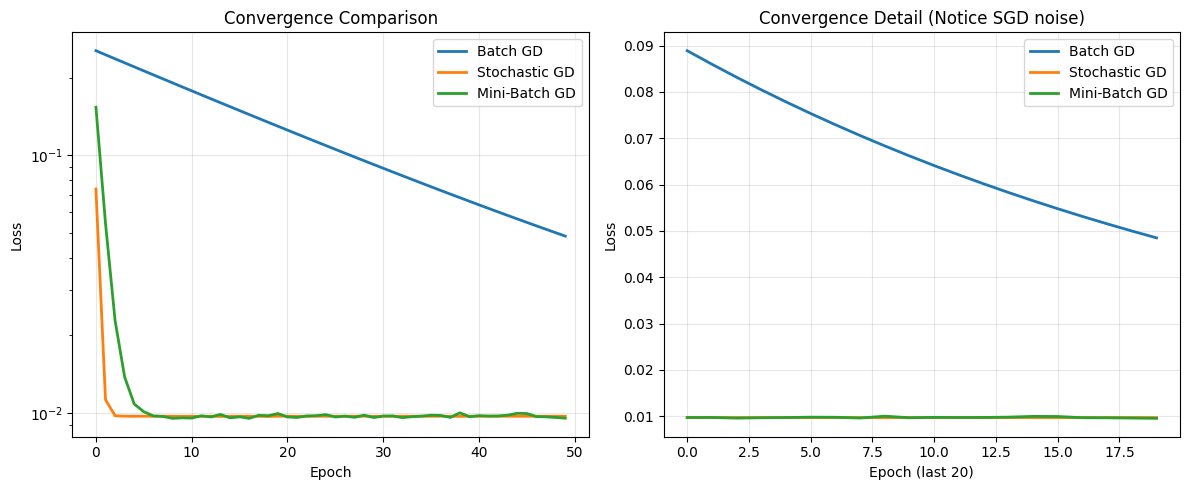

In [2]:
"""
Gradient Descent Variants: BGD, SGD, MBGD
Clean implementation for understanding and experimentation.

Author: Hamza
Course: CS231n - Lecture 3
"""

import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, Callable


class GradientDescent:
    """Base class for gradient descent optimization."""
    
    def __init__(self, learning_rate: float = 0.01):
        """
        Args:
            learning_rate: Step size for parameter updates
        """
        self.lr = learning_rate
        self.loss_history = []
        
    def compute_loss_and_gradient(self, X: np.ndarray, y: np.ndarray, 
                                   W: np.ndarray) -> Tuple[float, np.ndarray]:
        """
        Compute loss and gradient for linear regression (MSE loss).
        
        Args:
            X: Input features (N, D)
            y: Target labels (N,)
            W: Weights (D,)
            
        Returns:
            loss: Scalar loss value
            gradient: Gradient of loss w.r.t. W (D,)
        """
        N = X.shape[0]
        
        # Forward pass: predictions
        predictions = X.dot(W)
        
        # Loss (MSE)
        loss = np.mean((predictions - y) ** 2)
        
        # Gradient: dL/dW = (2/N) * X^T * (predictions - y)
        gradient = (2.0 / N) * X.T.dot(predictions - y)
        
        return loss, gradient


class BatchGD(GradientDescent):
    """Batch Gradient Descent - Uses full dataset per update."""
    
    def fit(self, X: np.ndarray, y: np.ndarray, 
            num_epochs: int = 100) -> np.ndarray:
        """
        Train using Batch Gradient Descent.
        
        Args:
            X: Training features (N, D)
            y: Training labels (N,)
            num_epochs: Number of passes through data
            
        Returns:
            W: Optimized weights (D,)
        """
        N, D = X.shape
        W = np.zeros(D)  # Initialize weights
        
        for epoch in range(num_epochs):
            # Compute gradient using ALL examples
            loss, gradient = self.compute_loss_and_gradient(X, y, W)
            
            # Update weights
            W = W - self.lr * gradient
            
            # Track loss
            self.loss_history.append(loss)
            
            if epoch % 10 == 0:
                print(f"Epoch {epoch}: Loss = {loss:.4f}")
        
        return W


class StochasticGD(GradientDescent):
    """Stochastic Gradient Descent - Uses one example per update."""
    
    def fit(self, X: np.ndarray, y: np.ndarray, 
            num_epochs: int = 100) -> np.ndarray:
        """
        Train using Stochastic Gradient Descent.
        
        Args:
            X: Training features (N, D)
            y: Training labels (N,)
            num_epochs: Number of passes through data
            
        Returns:
            W: Optimized weights (D,)
        """
        N, D = X.shape
        W = np.zeros(D)  # Initialize weights
        
        for epoch in range(num_epochs):
            # Shuffle data (important!)
            indices = np.random.permutation(N)
            epoch_loss = 0
            
            for i in indices:
                # Use ONE example
                Xi = X[i:i+1]  # Keep 2D shape
                yi = y[i:i+1]
                
                loss, gradient = self.compute_loss_and_gradient(Xi, yi, W)
                
                # Update weights
                W = W - self.lr * gradient
                
                epoch_loss += loss
            
            # Average loss over epoch
            avg_loss = epoch_loss / N
            self.loss_history.append(avg_loss)
            
            if epoch % 10 == 0:
                print(f"Epoch {epoch}: Avg Loss = {avg_loss:.4f}")
        
        return W


class MiniBatchGD(GradientDescent):
    """Mini-Batch Gradient Descent - Uses small batches per update."""
    
    def __init__(self, learning_rate: float = 0.01, batch_size: int = 32):
        """
        Args:
            learning_rate: Step size for parameter updates
            batch_size: Number of examples per batch
        """
        super().__init__(learning_rate)
        self.batch_size = batch_size
    
    def fit(self, X: np.ndarray, y: np.ndarray, 
            num_epochs: int = 100) -> np.ndarray:
        """
        Train using Mini-Batch Gradient Descent.
        
        Args:
            X: Training features (N, D)
            y: Training labels (N,)
            num_epochs: Number of passes through data
            
        Returns:
            W: Optimized weights (D,)
        """
        N, D = X.shape
        W = np.zeros(D)  # Initialize weights
        
        for epoch in range(num_epochs):
            # Shuffle data (important!)
            indices = np.random.permutation(N)
            epoch_loss = 0
            num_batches = 0
            
            # Process in batches
            for start_idx in range(0, N, self.batch_size):
                end_idx = min(start_idx + self.batch_size, N)
                batch_indices = indices[start_idx:end_idx]
                
                # Get batch
                X_batch = X[batch_indices]
                y_batch = y[batch_indices]
                
                loss, gradient = self.compute_loss_and_gradient(
                    X_batch, y_batch, W
                )
                
                # Update weights
                W = W - self.lr * gradient
                
                epoch_loss += loss
                num_batches += 1
            
            # Average loss over epoch
            avg_loss = epoch_loss / num_batches
            self.loss_history.append(avg_loss)
            
            if epoch % 10 == 0:
                print(f"Epoch {epoch}: Avg Loss = {avg_loss:.4f}")
        
        return W


def generate_data(N: int = 1000, D: int = 2, noise: float = 0.1) -> Tuple:
    """Generate synthetic linear regression data."""
    np.random.seed(42)
    
    # True weights
    W_true = np.random.randn(D)
    
    # Generate features
    X = np.random.randn(N, D)
    
    # Generate labels with noise
    y = X.dot(W_true) + noise * np.random.randn(N)
    
    return X, y, W_true


def compare_methods():
    """Compare all three gradient descent methods."""
    print("=" * 60)
    print("Comparing Gradient Descent Variants")
    print("=" * 60)
    
    # Generate data
    X, y, W_true = generate_data(N=1000, D=2)
    print(f"\nTrue weights: {W_true}")
    
    # Train with each method
    methods = {
        'Batch GD': BatchGD(learning_rate=0.01),
        'Stochastic GD': StochasticGD(learning_rate=0.001),  # Lower LR for stability
        'Mini-Batch GD': MiniBatchGD(learning_rate=0.01, batch_size=32)
    }
    
    results = {}
    for name, optimizer in methods.items():
        print(f"\n{name}:")
        print("-" * 40)
        W = optimizer.fit(X, y, num_epochs=50)
        results[name] = {
            'weights': W,
            'loss_history': optimizer.loss_history
        }
        print(f"Final weights: {W}")
        print(f"Final loss: {optimizer.loss_history[-1]:.4f}")
    
    # Plot convergence
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    for name, result in results.items():
        plt.plot(result['loss_history'], label=name, linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Convergence Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.yscale('log')
    
    plt.subplot(1, 2, 2)
    # Plot last 20 epochs to see noise
    for name, result in results.items():
        plt.plot(result['loss_history'][-20:], label=name, linewidth=2)
    plt.xlabel('Epoch (last 20)')
    plt.ylabel('Loss')
    plt.title('Convergence Detail (Notice SGD noise)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('gradient_descent_comparison.png', dpi=150)
    print("\n📊 Plot saved as 'gradient_descent_comparison.png'")
    plt.show()


if __name__ == "__main__":
    compare_methods()

🔟 The Mental Model (How to Think About This)
BGD = Taking a survey of everyone before making a decision

Accurate but slow
You wait for everyone's opinion

SGD = Making decisions based on one person's feedback

Fast but noisy
Sometimes wrong, but correct on average

MBGD = Polling a representative sample

Fast and reasonably accurate
Best of both worlds